Importing Libraries

In [75]:
import sys
!{sys.executable} -m pip install imbalanced-learn


You should consider upgrading via the 'c:\Users\barni\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [76]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn


You should consider upgrading via the 'c:\Users\barni\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


 Loading Dataset

In [88]:
df = pd.read_csv('loan_data.csv')
df.head()


,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,No,5849,NaN,Y
1,LP001003,Male,Yes,4583,128.0,N
2,LP001005,Male,Yes,3000,66.0,Y
3,LP001006,Male,Yes,2583,120.0,Y
4,LP001008,Male,No,6000,141.0,Y


In [79]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          598 non-null    object 
 1   Gender           598 non-null    object 
 2   Married          598 non-null    object 
 3   ApplicantIncome  598 non-null    int64  
 4   LoanAmount       577 non-null    float64
 5   Loan_Status      598 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.2+ KB


,ApplicantIncome,LoanAmount
count,598.000000,577.000000
mean,5292.252508,144.968804
std,5807.265364,82.704182
min,150.000000,9.000000
25%,2877.500000,100.000000
50%,3806.000000,127.000000
75%,5746.000000,167.000000
max,81000.000000,650.000000


 Exploratory Data Analysis (EDA)

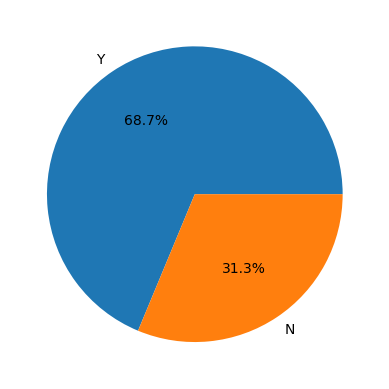

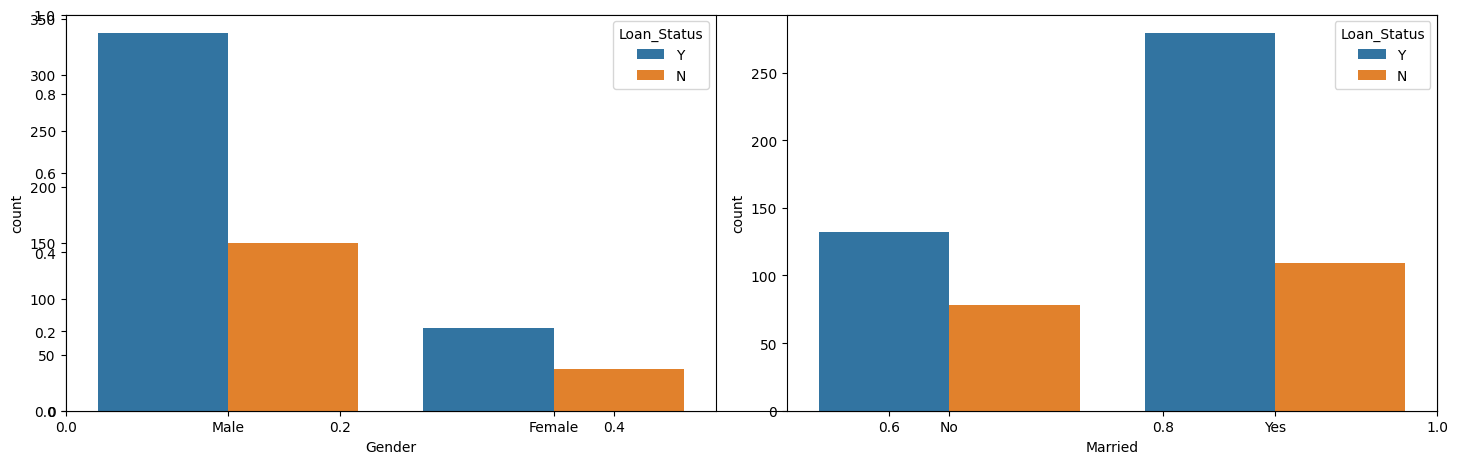

In [89]:
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()


Pie Chart & Count Plots with Custom Palette :chart_with_upwards_trend:

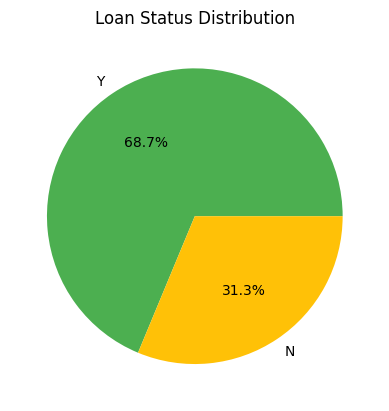

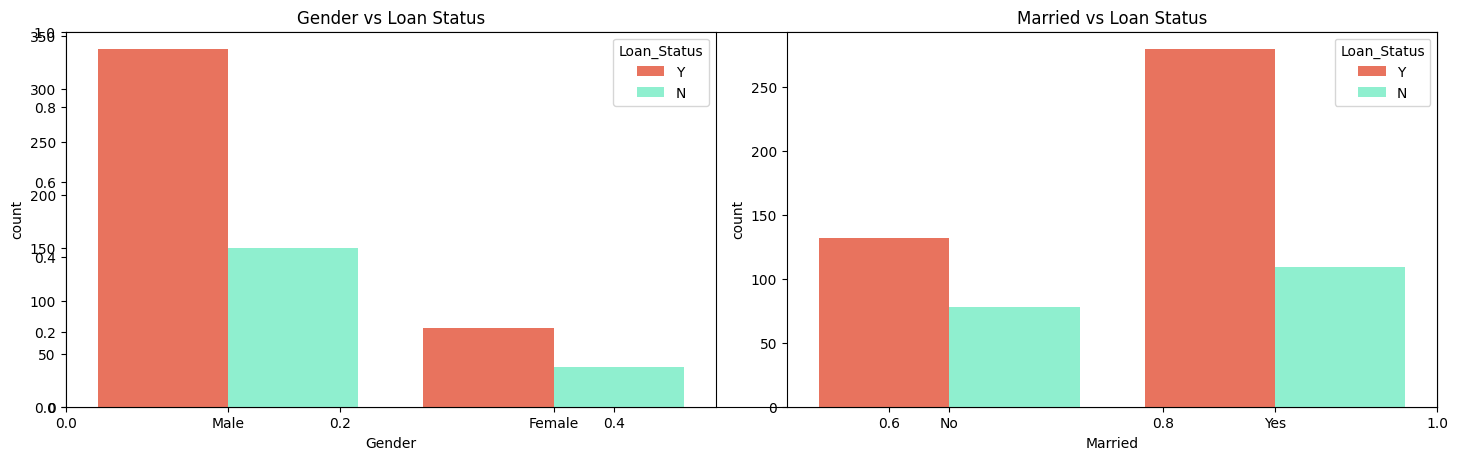

In [91]:
# Pie Chart with Custom Colors
temp = df['Loan_Status'].value_counts()
colors = ['#4CAF50', '#FFC107']  # green & amber (Y and N)
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%',
        colors=colors)
plt.title('Loan Status Distribution')
plt.show()

# Count Plots with Custom Palette
plt.subplots(figsize=(15, 5))
custom_palette = {'Y': '#FF6347', 'N': '#7FFFD4'}  # same colors as above

for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df, x=col, hue='Loan_Status', palette=custom_palette)
    plt.title(f'{col} vs Loan Status')

plt.tight_layout()
plt.show()


Chances of getting a loan approved for married people Vs ummarried people.

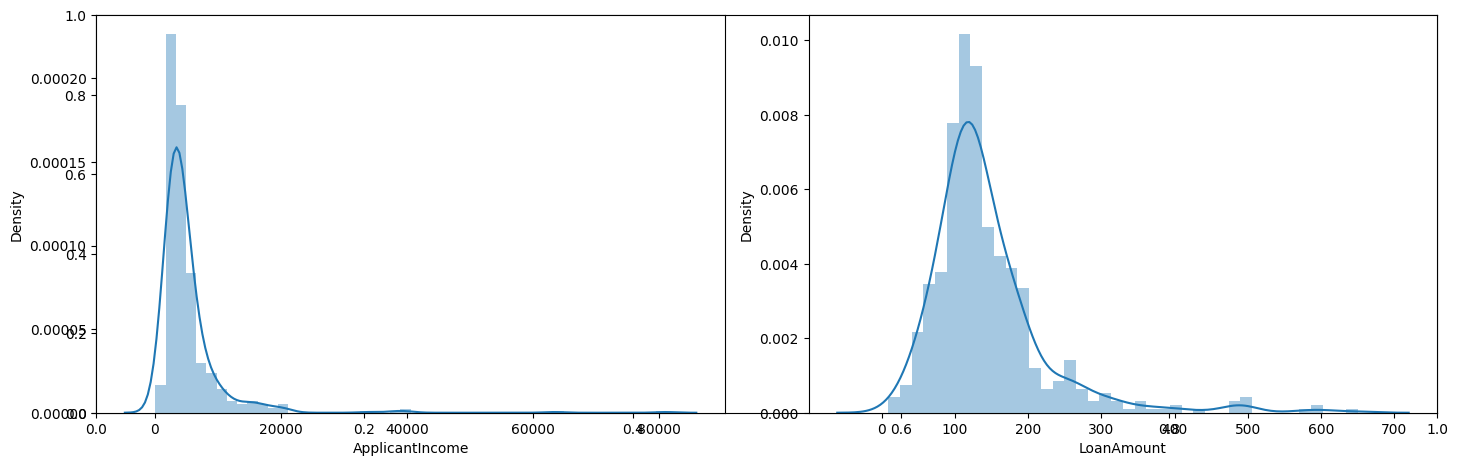

In [28]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()


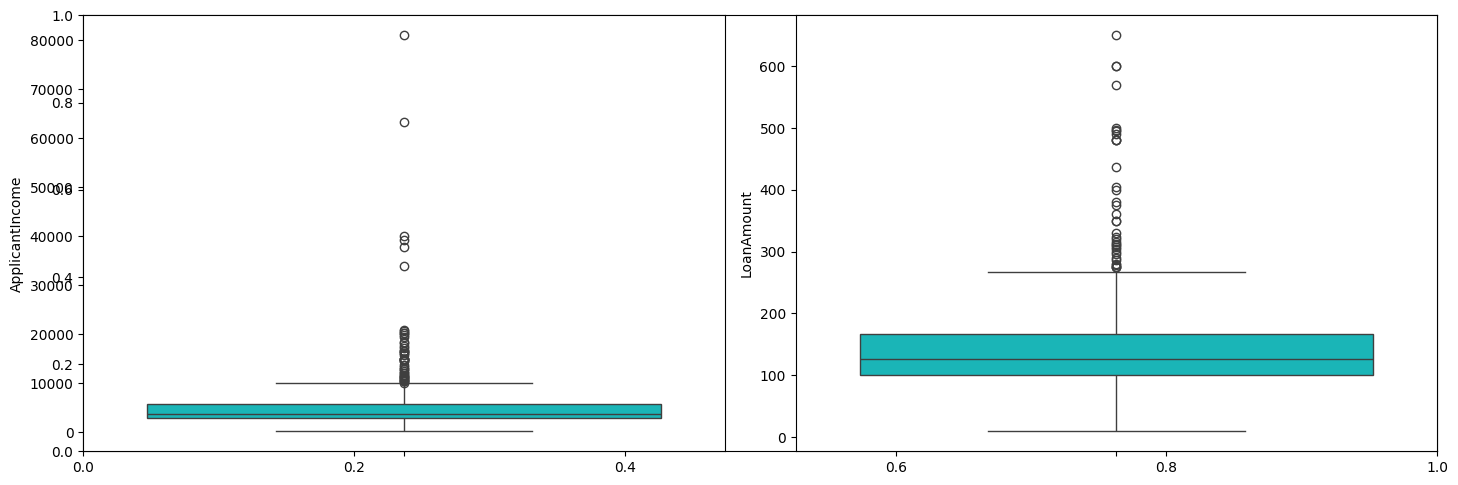

In [70]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(df[col], color="#00CED1")
plt.tight_layout()
plt.show()

In [34]:
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]
df.groupby('Gender').mean(numeric_only=True)['LoanAmount']
df.groupby(['Married', 'Gender']).mean(numeric_only=True)['LoanAmount']

Married  Gender
No       Female    116.115385
         Male      135.959677
Yes      Female    153.322581
         Male      150.875740
Name: LoanAmount, dtype: float64

In [36]:
df.groupby(['Married', 'Gender']).mean(numeric_only=True)['LoanAmount']

Married  Gender
No       Female    116.115385
         Male      135.959677
Yes      Female    153.322581
         Male      150.875740
Name: LoanAmount, dtype: float64

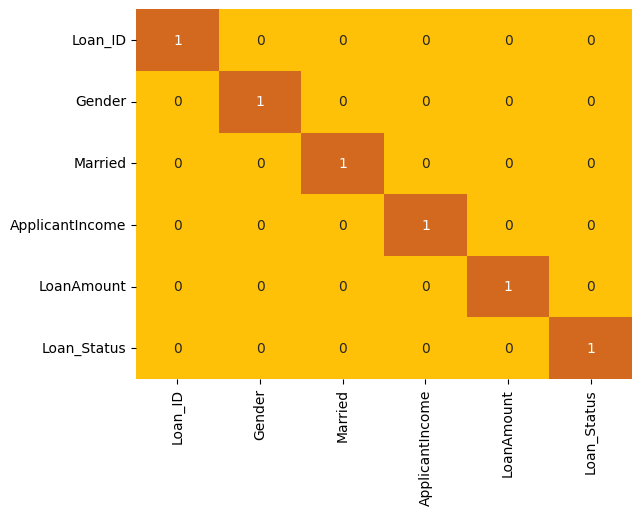

In [92]:
from matplotlib.colors import LinearSegmentedColormap

# Function to apply label encoding
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data

# Apply encoding
df = encode_labels(df)

# Define custom light purple colormap
light_purple_cmap = LinearSegmentedColormap.from_list(
    "light_purple", ["#FFC107", "#c8a2c8", "#D2691E"]
)

# Generate heatmap using custom colormap
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False, cmap=light_purple_cmap)
plt.show()
